# 아래 변수에 자신의 학번과 이름을 문자열로 저장하세요

In [2]:
student_number = '2023130543'
student_name = '강지안'

In [3]:
!pip3 install -r requirements.txt

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/9a/b0/dd2b60f2dd90fbc21d1d3129c36a453c322d7995d5e3589f5b3c59ee528d/matplotlib-3.8.2-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/f3/9e/8fb3f53144269d3fecdd8786d3a4686eeff55b9b35a3c0772a3f62f71e36/contourpy-1.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/85/8b/28528de4c7305963a525f611331cd33149003f6de8ed3c0d106eec348838/fonttools-4.45.1-cp312-cp312-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.2/155.2 kB 494.4 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency 

### 만일, 나눔 폰트를 설치하지 않았다면, 여기서 다운받아서 설치해 주세요.
[네이버 나눔글꼴](https://hangeul.naver.com/font)


In [5]:
import requests
from lxml import html
import urllib3
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm
# 나눔 폰트가 없다면 설치하기.
ft = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name][0][0]
plt.rcParams['font.family'] =ft
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)


In [6]:
data = {
    'id': 'kla',
    'topSearchWord': '',
    'pageIndex': '1',
    'initPageUnit': '0',
    'sillokType': 'S',
    'topSearchWord_ime': '',
}

response = requests.post('https://sillok.history.go.kr/search/inspectionMonthList.do', data=data, verify=False)
month_list = [link.split("', ")[0].replace("javascript:search('",'') for link in html.fromstring(response.text).xpath('//*[@id="cont_area"]/div/div[2]/ul[2]/li/ul/li//a/@href')]

In [7]:
days_list = []
for month in month_list:
    data = {
        'id': month,
        'did': '',
        'level': '3',
    }
    response = requests.post('https://sillok.history.go.kr/search/inspectionDayList.do', data=data, verify=False)
    days = html.fromstring(response.text).xpath('//*[@id="cont_area"]/div[1]/div[3]/div/dl/dd/ul/li/a/@href')
    days = [day.split("',")[0].replace("javascript:searchView('",'').replace("');",'') for day in days]
    days_list.extend(days)

### 문제. day_xpath 변수에 들어갈 적절한 표현을 넣어 주세요.
### 분류에 해당하는 요소 선택하기

In [8]:
base_url ='https://sillok.history.go.kr/id/'
injong_categories = []
for day_url in days_list:
    response = requests.get(base_url+day_url, verify=False)
    day_xpath = '//*[@id="cont_area"]/div[1]/div[3]/div[1]/div/div/ul[1]/li[2]/div'
    categories = [c.text.split(' / ') for c in html.fromstring(response.text).xpath(day_xpath)]
    injong_categories.extend(categories)

## 아래 코드를 실행시키고, 출력된 결과를 스크린 캡쳐 또는 이미지 파일로 만들어 블랙보드에 제출합니다.

Text(0.5, 1.0, '2023130543 강지안')

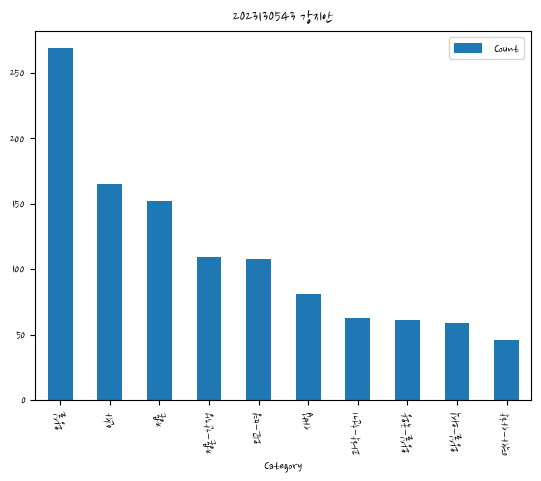

In [9]:
flat_injong_categories = [item.split("(")[0] for sublist in injong_categories for item in sublist]
cnt = Counter(flat_injong_categories)
df = pd.DataFrame(cnt.most_common(10), columns=['Category', 'Count'])
df.plot(x='Category', y='Count', kind='bar')
plt.title(f'{student_number} {student_name}')